In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import scipy
import statsmodels
from statsmodels.stats.weightstats import ztest as ztest
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
import src.lib.utility_classfier as uclf

In [6]:
data_path='/Users/lifuchen/Desktop/research/data.csv'
df = pd.read_csv(data_path)
df.shape

(109490, 89)

In [7]:
df

,GRID,GENDER,Race_B,Race_W,AGE,DURATION_BF2007,Smoking,MAX_BMI_missing,MAX_VALUE_Chol_missing,MAX_VALUE_Creat_missing,...,CNT_MedCode_4124,CNT_MedCode_4603,CNT_MedCode_4917,CNT_MedCode_5487,CNT_MedCode_5640,CNT_MedCode_6918,CNT_MedCode_798302,CNT_MedCode_83367,CNT_MedCode_836,Class
0,R247513794,1,0,1,59,5411,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,R239544414,0,0,1,47,397,1,0,1,0,...,0,0,0,1,1,1,0,0,0,0
2,R215940379,1,0,1,51,2738,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,R230872807,0,1,0,28,489,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,R227723582,1,0,1,41,1093,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109485,R294670944,1,0,1,57,853,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
109486,R249681098,1,1,0,25,1078,0,0,1,1,...,1,0,0,0,1,0,0,0,0,0
109487,R262016973,1,0,1,41,3334,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
109488,R208290840,1,0,1,50,3472,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [8]:
white = df[df['Race_W'] == 1]
black = df[df['Race_W'] == 0]
male = df[df['GENDER'] == 0]
female = df[df['GENDER'] == 1]
case = df[df['Class'] == 1]
control = df[df['Class'] == 0]
print (white.shape)
print (black.shape)
print (male.shape)
print (female.shape)
print (case.shape)
print (control.shape)

(94506, 89)
(14984, 89)
(38853, 89)
(70637, 89)
(9824, 89)
(99666, 89)


In [9]:
white_case = white[white['Class']==1]
black_case = black[black['Class']==1]
male_case = male[male['Class']==1]
female_case = female[female['Class']==1]
print(white_case.shape)
print(black_case.shape)
print(male_case.shape)
print(female_case.shape)

(8522, 89)
(1302, 89)
(4250, 89)
(5574, 89)


In [15]:
def z_test (vec1, vec2):
    stat, pval = ztest(vec1, vec2, value=0)
    print ('%.4f' % (pval*30)) #30 comparisons in total, Bonferroni correction

In [23]:
def t_test (vec1, vec2):
    stat, pval = scipy.stats.ttest_ind(vec1, vec2, equal_var = False, alternative = 'two-sided')
    
    #30 comparisons in total, Bonferroni correction
    # print ('%.3f' % (pval*30)) 
    print (pval*30)

In [24]:
from statsmodels.stats.proportion import proportions_ztest
def z_test_proportion (vec1, vec2):
    successes = np.array([sum(vec1 == 1), sum(vec2 == 1)])
    samples = np.array([len(vec1), len(vec2)])
    stat, pval = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
    print ('%.3f' % (pval*30)) #30 comparisons in total, Bonferroni correction

In [25]:
t_test(white['AGE'], black['AGE'])
t_test(white['DURATION_BF2007'], black['DURATION_BF2007'])
t_test(white['MEDIAN_SYSTOLIC'], black['MEDIAN_SYSTOLIC'])
t_test(white['MEDIAN_DIASTOLIC'], black['MEDIAN_DIASTOLIC'])
t_test(white['MEDIAN_BMI'], black['MEDIAN_BMI'])
t_test(white['MEDIAN_VALUE_Chol'], black['MEDIAN_VALUE_Chol'])
t_test(white['MEDIAN_VALUE_Trigs'], black['MEDIAN_VALUE_Trigs'])
t_test(white['MEDIAN_VALUE_Creat'], black['MEDIAN_VALUE_Creat'])
t_test(white['MEDIAN_VALUE_Gluc'], black['MEDIAN_VALUE_Gluc'])
t_test(white['MEDIAN_VALUE_HDL-C'], black['MEDIAN_VALUE_HDL-C'])
t_test(white['MEDIAN_VALUE_LDL-C'], black['MEDIAN_VALUE_LDL-C'])

z_test_proportion(white['Smoking'], black['Smoking'])
z_test_proportion(white['CNT_250'], black['CNT_250'])
z_test_proportion(white['CNT_401'], black['CNT_401'])

0.0
1.3021277544431089e-129
2.5252436897142406e-48
1.8368529055929385e-87
2.7022219414487873e-260
2.8878433766413947e-48
6.225145229619556e-122
2.212896360571767e-14
1.3910703374734312e-05
2.0114211865629486e-21
1.985432820016278e-06
14.604
0.000
0.000


In [26]:
t_test(male['AGE'], female['AGE'])
t_test(male['DURATION_BF2007'], female['DURATION_BF2007'])
t_test(male['MEDIAN_SYSTOLIC'], female['MEDIAN_SYSTOLIC'])
t_test(male['MEDIAN_DIASTOLIC'], female['MEDIAN_DIASTOLIC'])
t_test(male['MEDIAN_BMI'], female['MEDIAN_BMI'])
t_test(male['MEDIAN_VALUE_Chol'], female['MEDIAN_VALUE_Chol'])
t_test(male['MEDIAN_VALUE_Trigs'], female['MEDIAN_VALUE_Trigs'])
t_test(male['MEDIAN_VALUE_Creat'], female['MEDIAN_VALUE_Creat'])
t_test(male['MEDIAN_VALUE_Gluc'], female['MEDIAN_VALUE_Gluc'])
t_test(male['MEDIAN_VALUE_HDL-C'], female['MEDIAN_VALUE_HDL-C'])
t_test(male['MEDIAN_VALUE_LDL-C'], female['MEDIAN_VALUE_LDL-C'])

z_test_proportion(male['Smoking'], female['Smoking'])
z_test_proportion(male['CNT_250'], female['CNT_250'])
z_test_proportion(male['CNT_401'], female['CNT_401'])

8.558217225463307e-54
3.9634269461422624e-182
0.0
0.0
0.0051857429536379
3.415478891036019e-149
0.0
0.0
2.160346084122277e-174
0.0
6.797117614557524e-112
0.000
0.000
0.000


In [26]:
def sum_data (records, df):
    n = df.shape [0]
    records.append({
        'Class': '%.1f (± %.1f)' % (100*df['Class'].mean(), df['Class'].std()),
        'age': '%.1f (± %.1f)' % (df['AGE'].mean(), df['AGE'].std()),
        'EHR length': '%.1f (± %.1f)' % (df['DURATION_BF2007'].mean(), df['DURATION_BF2007'].std()),
        'smoking': '%.1f (± %.1f)' % (100*df['Smoking'].mean(), df['Class'].std()),
        'systolic pressure': '%.1f (± %.1f)' % (df['MEDIAN_SYSTOLIC'].mean(), df['MEDIAN_SYSTOLIC'].std()),
        'diastolic pressure': '%.1f (± %.1f)' % (df['MEDIAN_DIASTOLIC'].mean(), df['MEDIAN_DIASTOLIC'].std()),
        'BMI': '%.1f (± %.1f)' % (df['MEDIAN_BMI'].mean(), df['MEDIAN_BMI'].std()),
        'cholestrol': '%.1f (± %.1f)' % (df['MEDIAN_VALUE_Chol'].mean(), df['MEDIAN_VALUE_Chol'].std()),
        'triglycerides': '%.1f (± %.1f)' % (df['MEDIAN_VALUE_Trigs'].mean(), df['MEDIAN_VALUE_Trigs'].std()),
        'creatinine': '%.1f (± %.1f)' % (df['MEDIAN_VALUE_Creat'].mean(), df['MEDIAN_VALUE_Creat'].std()),
        'glucose': '%.1f (± %.1f)' % (df['MEDIAN_VALUE_Gluc'].mean(), df['MEDIAN_VALUE_Gluc'].std()),
        'HDL': '%.1f (± %.1f)' % (df["MEDIAN_VALUE_HDL-C"].mean(), df["MEDIAN_VALUE_HDL-C"].std()),
        'LDL': '%.1f (± %.1f)' % (df['MEDIAN_VALUE_LDL-C'].mean(), df['MEDIAN_VALUE_LDL-C'].std()),
        'diabetes': '%.1f (± %.1f)' % (100*df['CNT_250'].mean(), df['CNT_250'].std()),
        'hypertension': '%.1f (± %.1f)' % (100*df['Smoking'].mean(), df['Smoking'].std()),                           
        #'diabetes': '%.1f (± %.1f)' % (df['CNT_250'].mean(), df['CNT_250'].std()),
        #'hypertension': '%.1f (± %.1f)' % (df['CNT_401'].mean(), df['CNT_401'].std()),
        })

In [106]:
records = []
sum_data(records,df)
sum_data(records,white)
sum_data(records,black)
sum_data(records,male)
sum_data(records,female)

overall_result = pd.DataFrame(records)

result_path='/Users/lifuchen/Desktop/research/'
overall_result.to_csv(path.join(result_path,'characteristic comparison.csv'), index=False)

In [48]:
def missing_data (records, df):
    n = df.shape [0]
    records.append({
        'MAX_BMI_missing': '%.1f' % (100*df['MAX_BMI_missing'].mean()),
        'MAX_VALUE_Chol_missing': '%.1f' % (100*df['MAX_VALUE_Chol_missing'].mean()),
        'MAX_VALUE_Creat_missing': '%.1f' % (100*df['MAX_VALUE_Creat_missing'].mean()),
        'MAX_VALUE_Gluc_missing': '%.1f' % (100*df['MAX_VALUE_Gluc_missing'].mean()),
        'MAX_VALUE_HDL-C_missing': '%.1f' % (100*df['MAX_VALUE_HDL-C_missing'].mean()),
        'MAX_VALUE_LDL-C_missing': '%.1f' % (100*df['MAX_VALUE_LDL-C_missing'].mean()),
        'MAX_VALUE_Trigs_missing': '%.1f' % (100*df['MAX_VALUE_Trigs_missing'].mean())
        })

In [53]:
z_test_proportion(white['MAX_BMI_missing'], black['MAX_BMI_missing'])
z_test_proportion(white['MAX_VALUE_Chol_missing'], black['MAX_VALUE_Chol_missing'])
z_test_proportion(white['MAX_VALUE_Creat_missing'], black['MAX_VALUE_Creat_missing'])
z_test_proportion(white['MAX_VALUE_Gluc_missing'], black['MAX_VALUE_Gluc_missing'])
z_test_proportion(white['MAX_VALUE_HDL-C_missing'], black['MAX_VALUE_HDL-C_missing'])
z_test_proportion(white['MAX_VALUE_LDL-C_missing'], black['MAX_VALUE_LDL-C_missing'])
z_test_proportion(white['MAX_VALUE_Trigs_missing'], black['MAX_VALUE_Trigs_missing'])

0.199
0.000
0.000
0.000
0.000
0.000
0.000


In [54]:
z_test_proportion(male['MAX_BMI_missing'], female['MAX_BMI_missing'])
z_test_proportion(male['MAX_VALUE_Chol_missing'], female['MAX_VALUE_Chol_missing'])
z_test_proportion(male['MAX_VALUE_Creat_missing'], female['MAX_VALUE_Creat_missing'])
z_test_proportion(male['MAX_VALUE_Gluc_missing'], female['MAX_VALUE_Gluc_missing'])
z_test_proportion(male['MAX_VALUE_HDL-C_missing'], female['MAX_VALUE_HDL-C_missing'])
z_test_proportion(male['MAX_VALUE_LDL-C_missing'], female['MAX_VALUE_LDL-C_missing'])
z_test_proportion(male['MAX_VALUE_Trigs_missing'], female['MAX_VALUE_Trigs_missing'])

0.000
0.000
0.000
0.000
0.000
0.000
0.000


In [52]:
records_missing = []
missing_data(records_missing,df)
missing_data(records_missing,white)
missing_data(records_missing,black)
missing_data(records_missing,male)
missing_data(records_missing,female)

overall_result = pd.DataFrame(records_missing).transpose()

result_path='/Users/lifuchen/Desktop/research/'
overall_result.to_csv(path.join(result_path,'missing value comparison.csv'), index=False)

In [4]:
df['GENDER'].describe()


count    109490.000000
mean          0.645146
std           0.478471
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: GENDER, dtype: float64

In [5]:
df['Race_B'].describe()

count    109490.000000
mean          0.136853
std           0.343693
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Race_B, dtype: float64

In [6]:
df['Race_W'].describe()

count    109490.000000
mean          0.863147
std           0.343693
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Race_W, dtype: float64

In [7]:
df['AGE'].describe()

count    109490.000000
mean         47.375696
std          14.655215
min          25.000000
25%          35.000000
50%          46.000000
75%          58.000000
max          85.000000
Name: AGE, dtype: float64

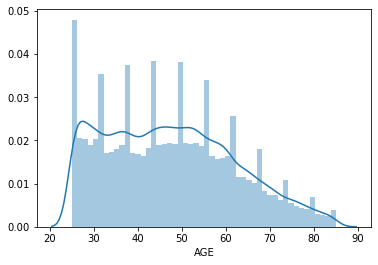

In [8]:
sns.distplot(df['AGE']);

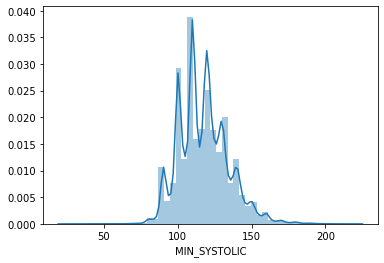

In [9]:
sns.distplot(df['MIN_SYSTOLIC']);

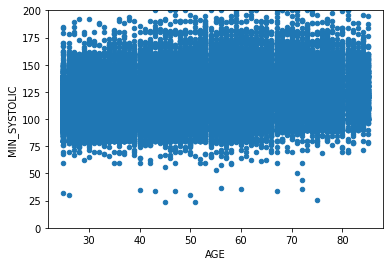

In [11]:
var = 'AGE'
data = pd.concat([df['MIN_SYSTOLIC'], df[var]], axis=1)
data.plot.scatter(x=var, y='MIN_SYSTOLIC', ylim=(0,200));

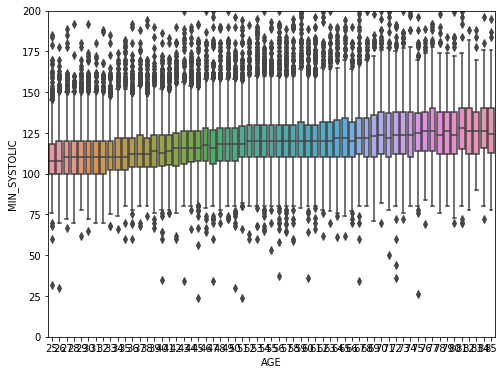

In [14]:
var = 'AGE'
data = pd.concat([df['MIN_SYSTOLIC'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MIN_SYSTOLIC", data=data)
fig.axis(ymin=0, ymax=200);

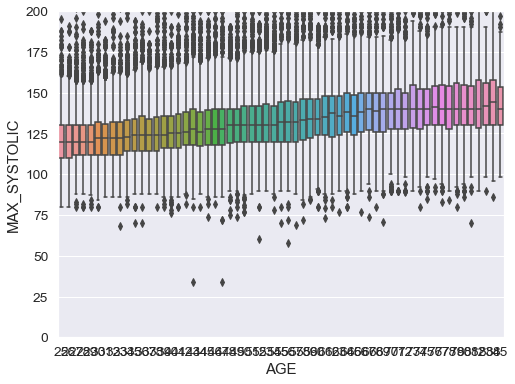

In [20]:
var = 'AGE'
data = pd.concat([df['MAX_SYSTOLIC'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MAX_SYSTOLIC", data=data)
fig.axis(ymin=0, ymax=200);

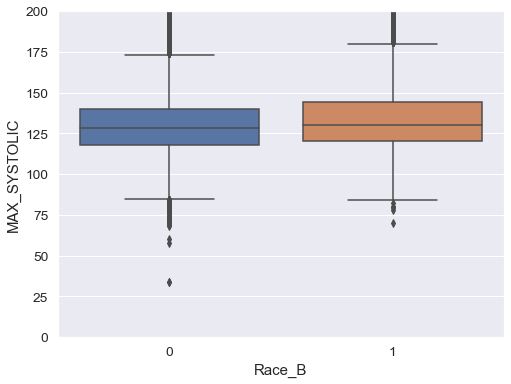

In [21]:
var = 'Race_B'
data = pd.concat([df['MAX_SYSTOLIC'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MAX_SYSTOLIC", data=data)
fig.axis(ymin=0, ymax=200);

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Class,0,0.0
MIN_VALIE_Trigs,0,0.0
MAX_BMI,0,0.0
MEDIAN_BMI,0,0.0
STD_BMI,0,0.0
MAX_VALUE_Chol,0,0.0
MAX_VALUE_Creat,0,0.0
MAX_VALUE_Gluc,0,0.0
MAX_VALUE_HDL-C,0,0.0
MAX_VALUE_LDL-C,0,0.0


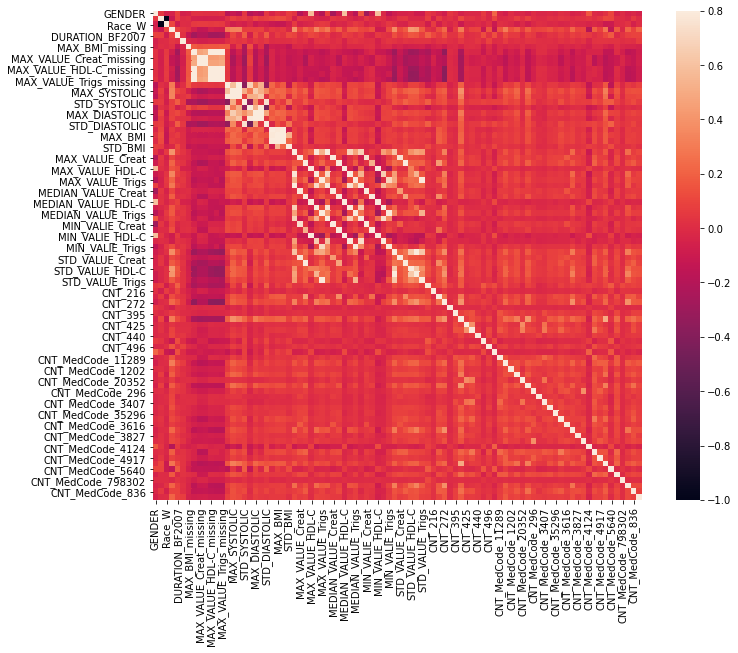

In [15]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

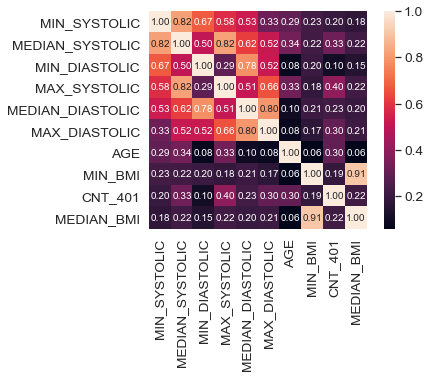

In [16]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'MIN_SYSTOLIC')['MIN_SYSTOLIC'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()